In [8]:
from apriltag_detection import *
import cv2

from PIDcontrols import *

In [9]:
vertical_pid = PID(30, 0, 0, 100)
horizontal_pid = PID(30, 0, 0, 100)

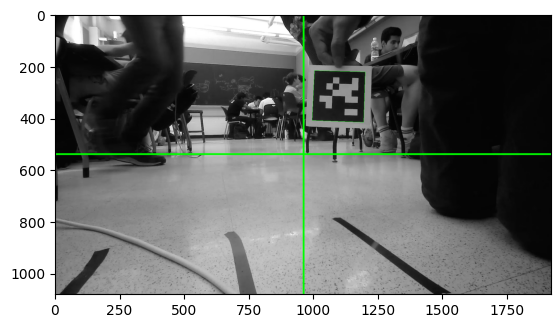

In [10]:
video = cv2.VideoCapture('AprilTagTest.mkv')
pose = detect_tag(video)
headingE = pose[0]
depthE = pose[1]

In [11]:
horizontal_output, vertical_output = PID_tags((1920, 1080), headingE, depthE, horizontal_pid, vertical_pid)


In [12]:
horizontal_output, vertical_output


(16697.03934250614, -19299.489706384607)

In [13]:
vertical_pid = PID(1, 0, -.5, 100)
horizontal_pid = PID(1, 0, -.5, 100)

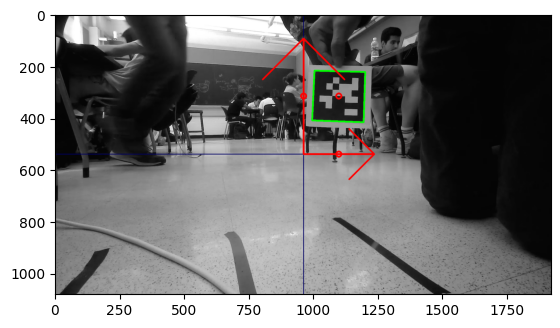

on Frame: 1.0


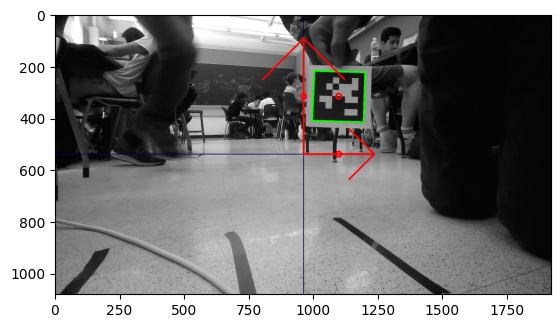

on Frame: 2.0


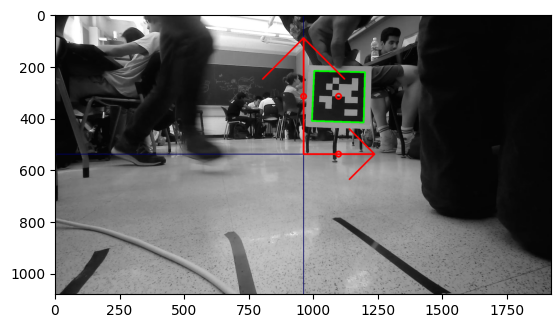

on Frame: 3.0


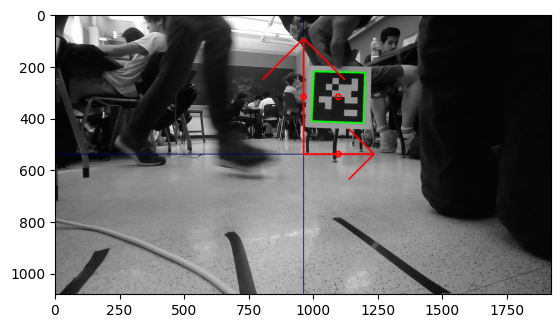

on Frame: 4.0


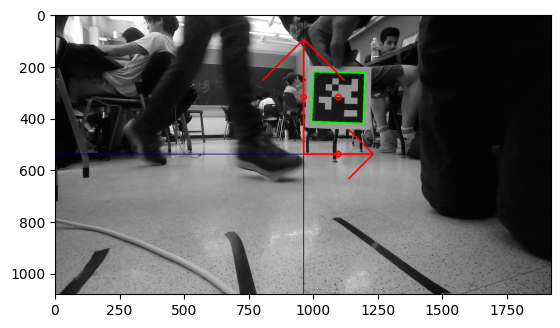

on Frame: 5.0


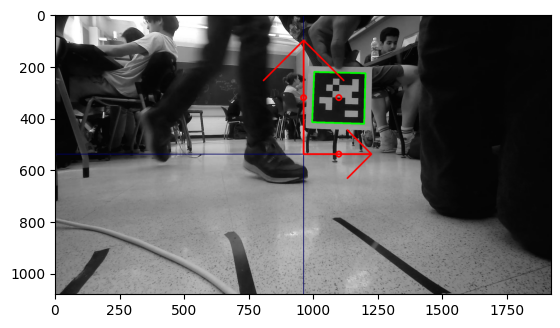

on Frame: 6.0


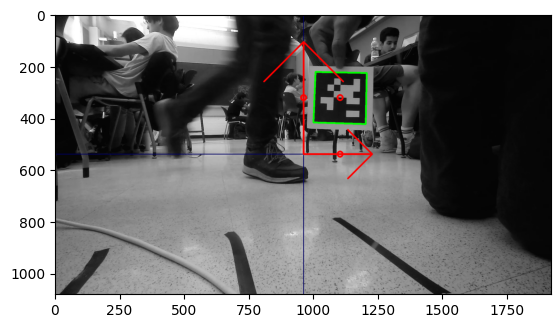

on Frame: 7.0


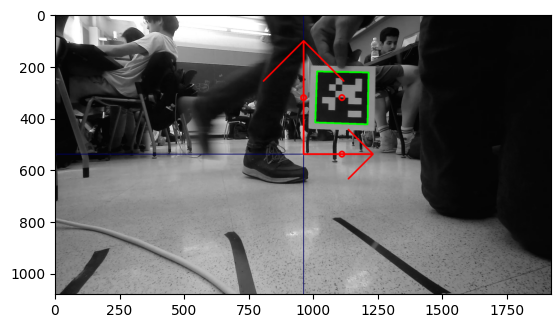

on Frame: 8.0


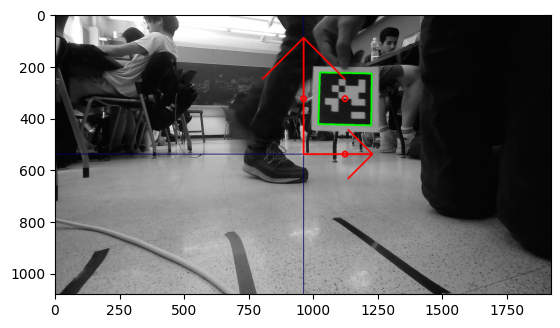

on Frame: 9.0


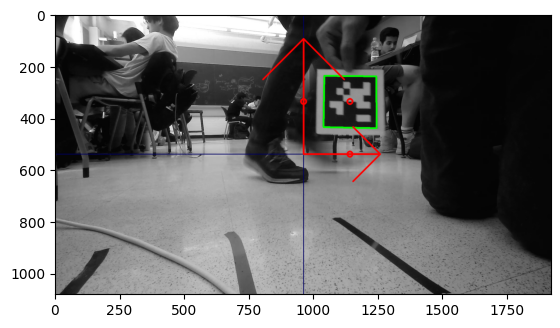

on Frame: 10.0


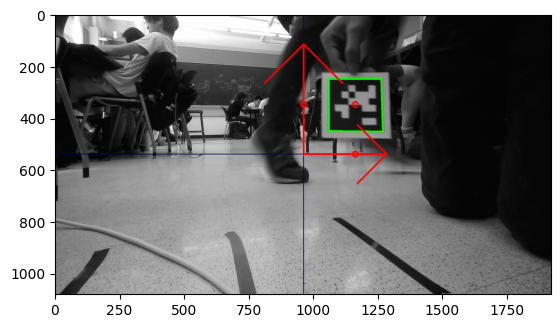

on Frame: 11.0


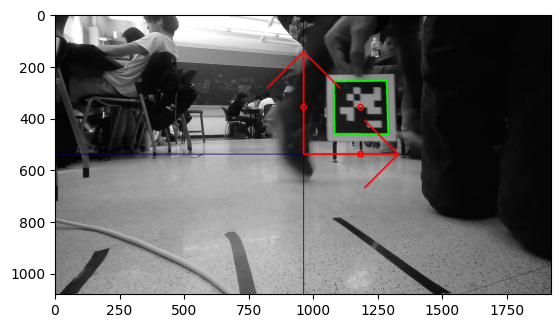

on Frame: 12.0


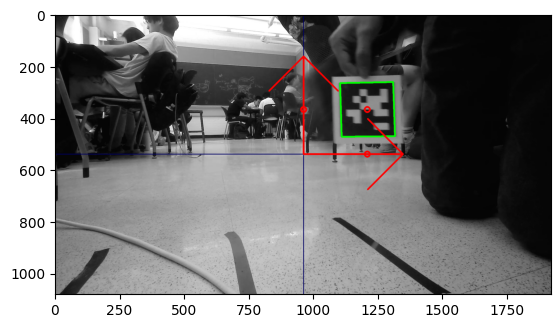

on Frame: 13.0


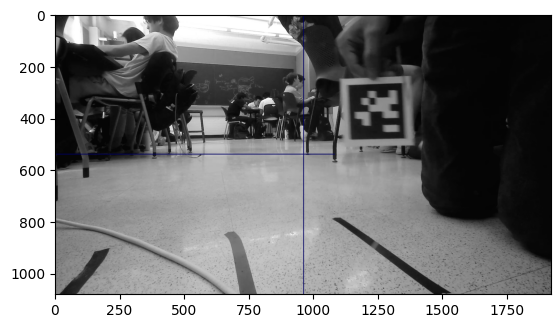

on Frame: 14.0


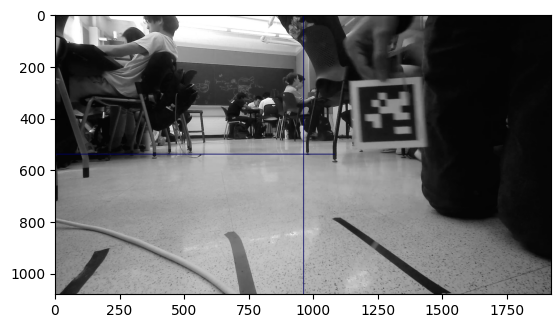

on Frame: 15.0


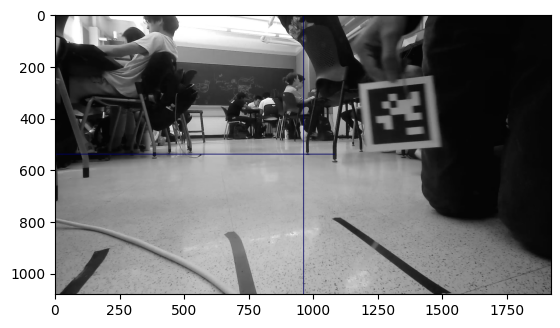

on Frame: 16.0


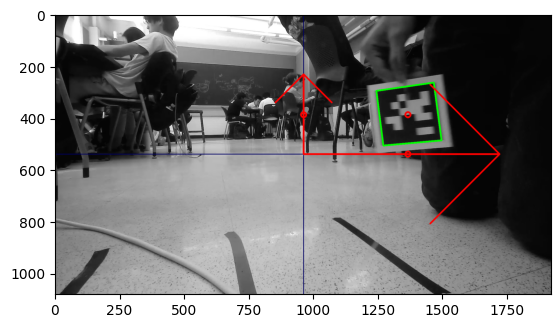

on Frame: 17.0


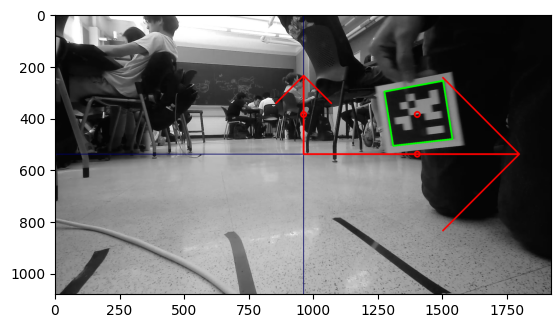

on Frame: 18.0


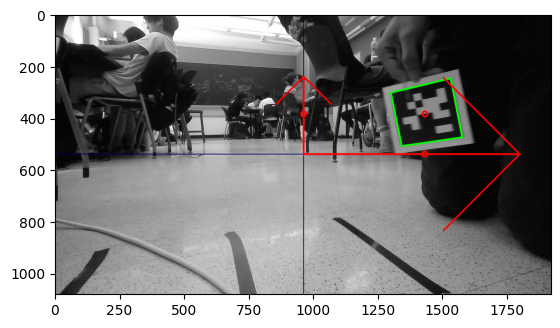

on Frame: 19.0


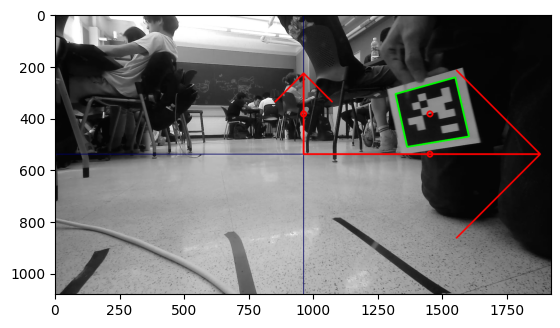

on Frame: 20.0


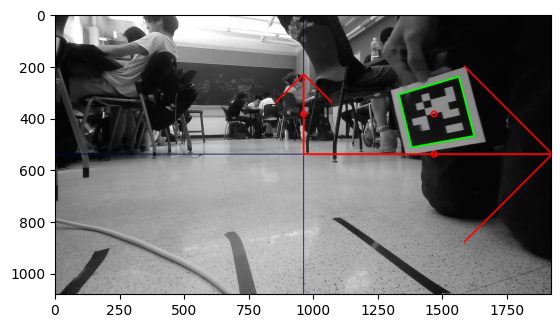

on Frame: 21.0


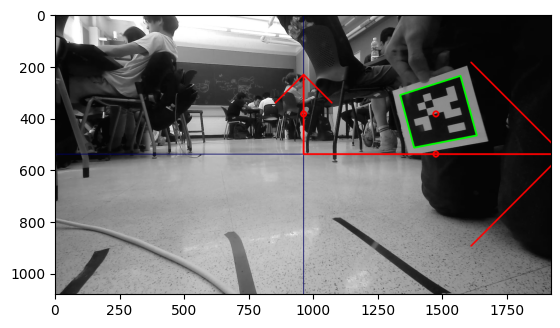

on Frame: 22.0


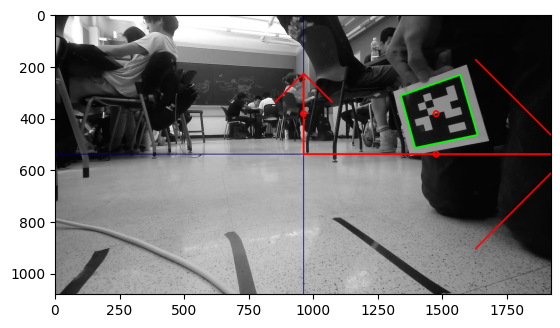

on Frame: 23.0


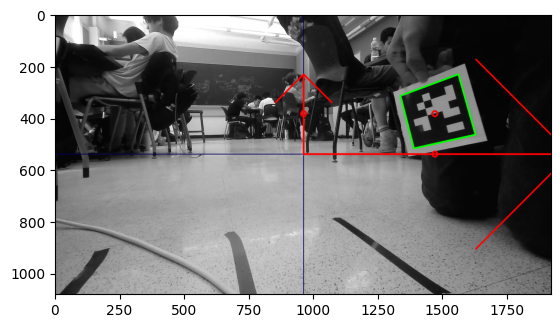

on Frame: 24.0


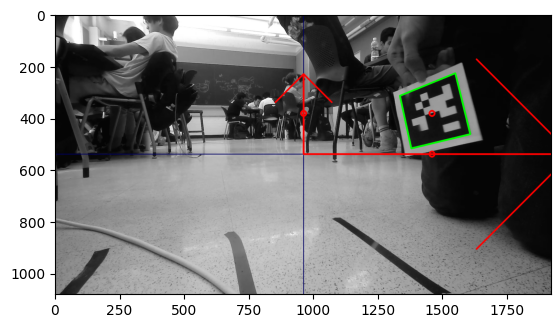

on Frame: 25.0


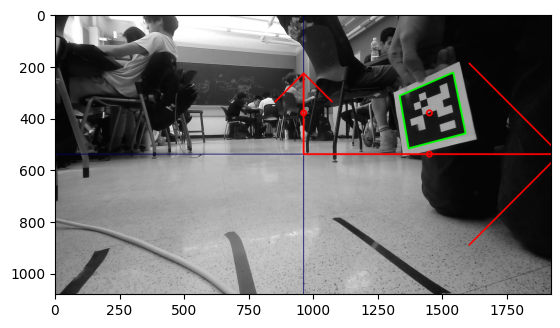

on Frame: 26.0


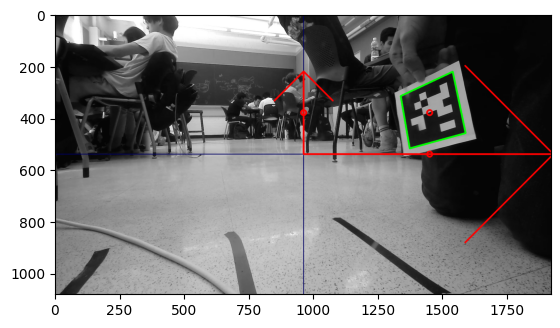

on Frame: 27.0


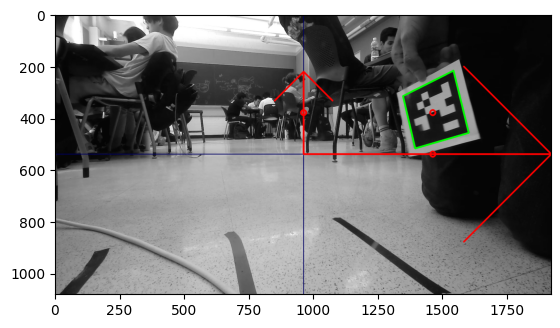

on Frame: 28.0


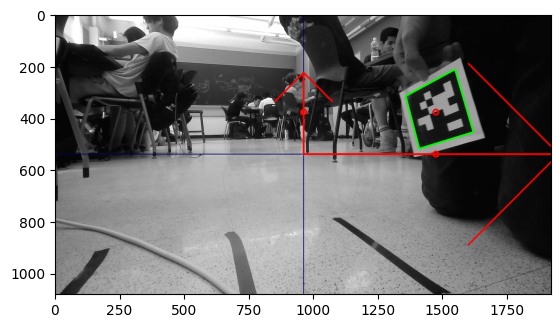

on Frame: 29.0


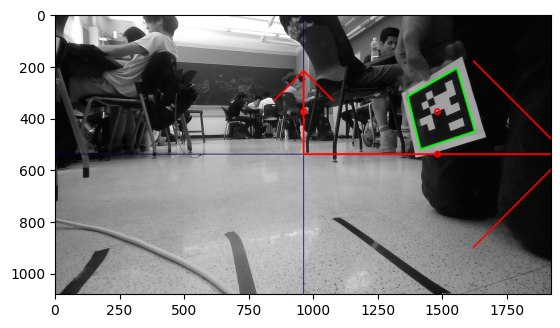

on Frame: 30.0


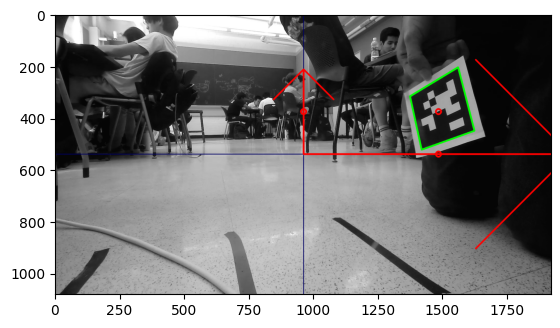

on Frame: 31.0


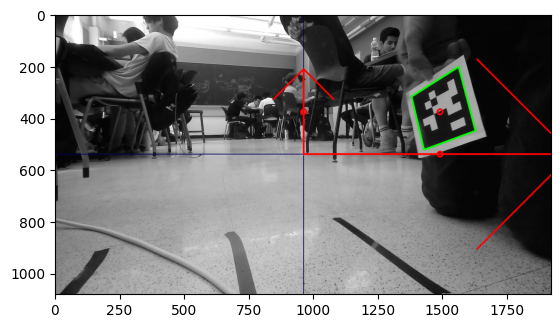

on Frame: 32.0


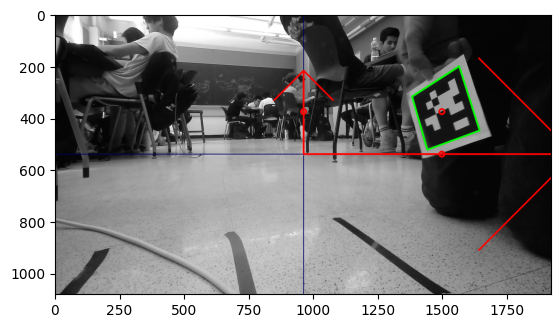

on Frame: 33.0


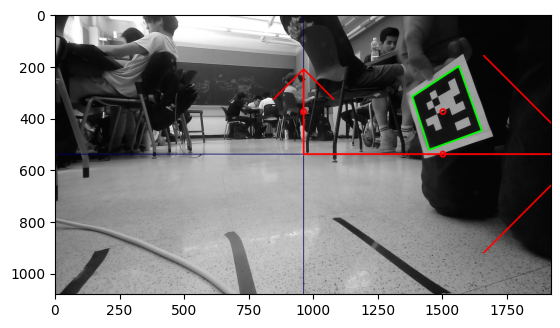

on Frame: 34.0


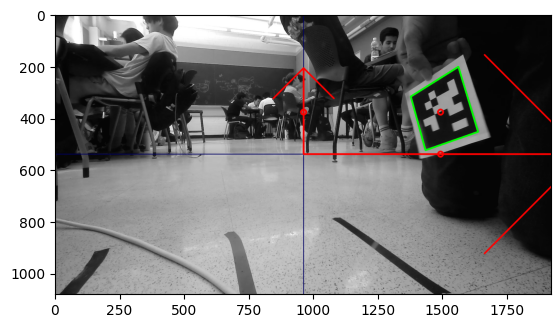

on Frame: 35.0


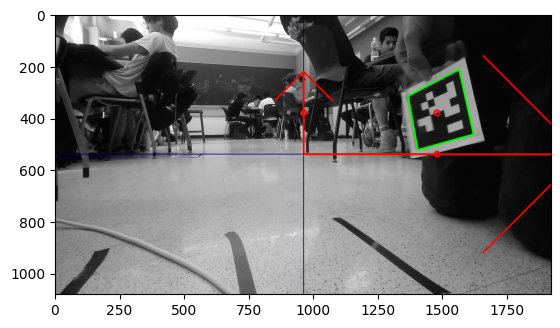

on Frame: 36.0


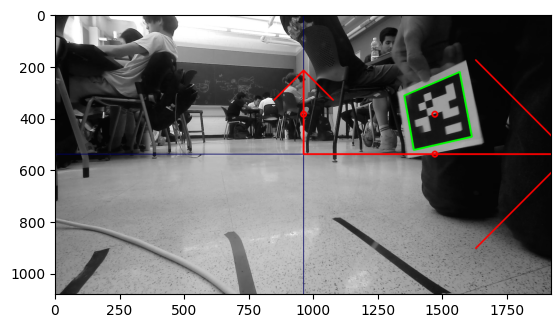

on Frame: 37.0


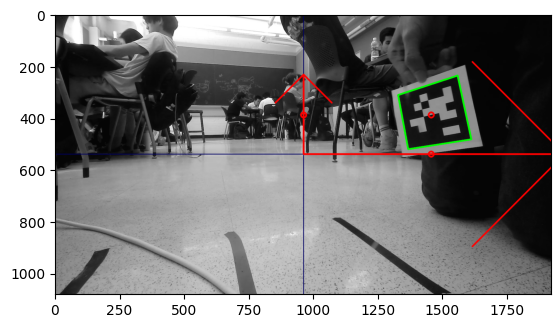

on Frame: 38.0


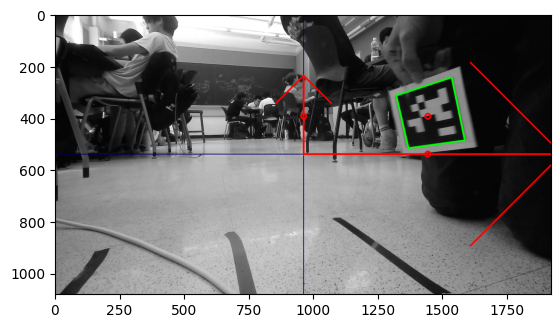

on Frame: 39.0


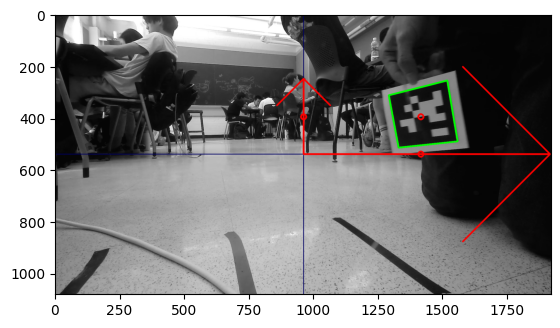

on Frame: 40.0


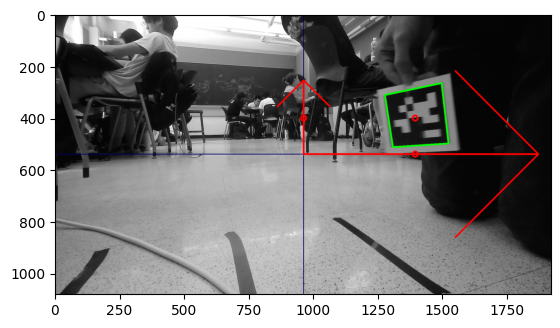

on Frame: 41.0


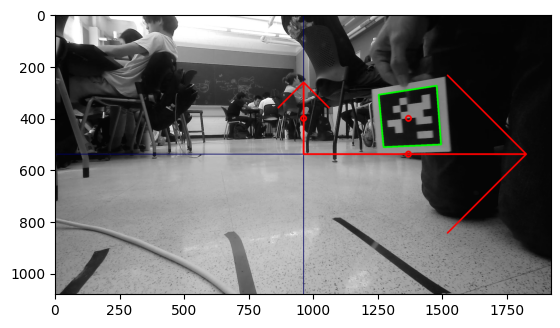

on Frame: 42.0


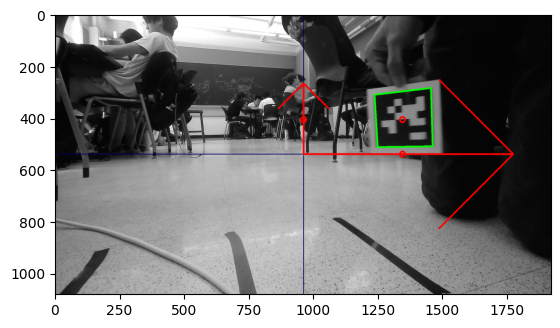

on Frame: 43.0


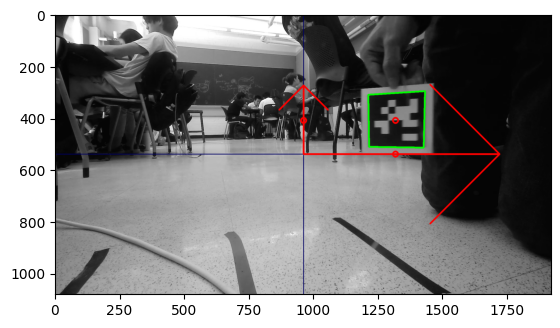

on Frame: 44.0


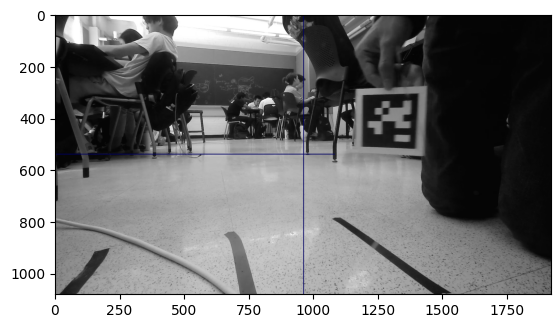

on Frame: 45.0


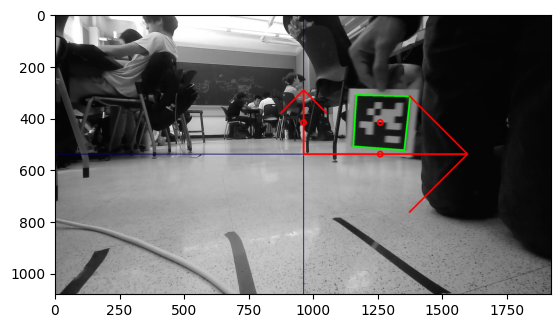

on Frame: 46.0


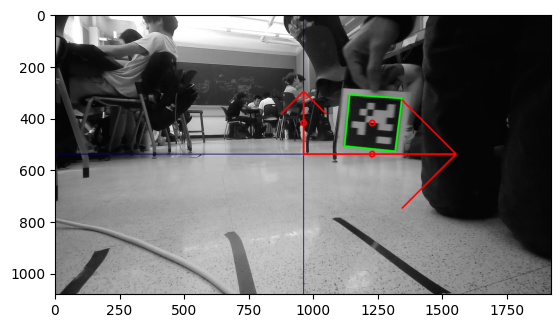

on Frame: 47.0


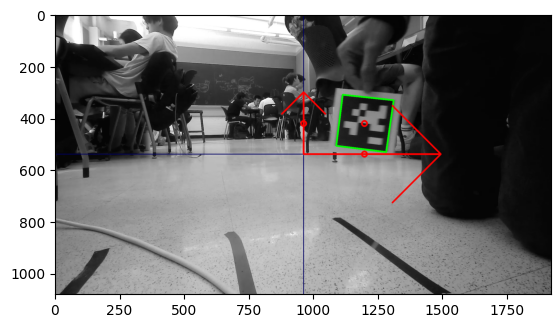

on Frame: 48.0


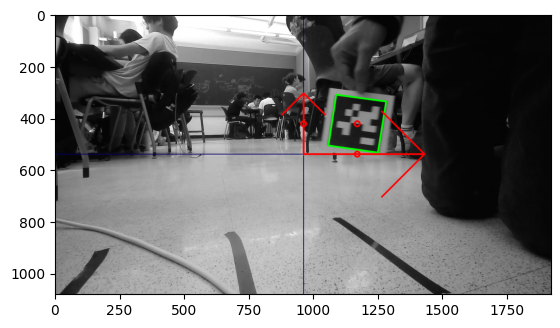

on Frame: 49.0


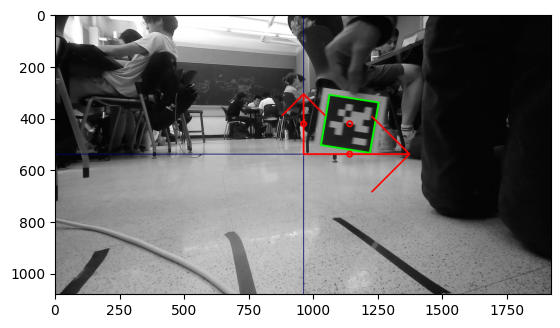

on Frame: 50.0


In [23]:
video = cv2.VideoCapture('AprilTagTest.mkv')

'''fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'april_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))'''

ret, frame = video.read()
i = 0
cameraMatrix = numpy.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))
camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )

at_detector = Detector(families='tag36h11',
                    nthreads=1,
                    quad_decimate=1.0,
                    quad_sigma=0.0,
                    refine_edges=1,
                    decode_sharpening=0.25,
                    debug=0)

PID_horizontal_output_lists = []
PID_vertical_output_lists = []
img_array = []
while ret:
    i += 1
    
    
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    tags = at_detector.detect(img, False, camera_params, tag_size = 0.1)
    #draw the lines splitting the image into quadrants
    Xcenter = int(color_img.shape[1]/2)
    Ycenter =int(color_img.shape[0]/2)
    cv2.line(color_img, (Xcenter,0), (Xcenter,color_img.shape[0]), (100, 0, 0), 2)
    cv2.line(color_img, (0,Ycenter), (color_img.shape[0],Ycenter), (100, 0, 0), 2)

    for tag in tags:
        #draw the corners of the apriltag
        for idx in range(len(tag.corners)):
            cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0), 5)
        #draw the center of the tag   
        cv2.circle(color_img, (int(tag.center[0].item()),int(tag.center[1].item())), 10, (0, 0, 255), 5)
        #draw where the center of the tag lies on the x an y axis
        cv2.circle(color_img, (int(tag.center[0].item()),int(color_img.shape[0]/2)), 10, (0, 0, 255), 5)
        cv2.circle(color_img, (int(color_img.shape[1]/2),int(tag.center[1].item())), 10, (0, 0, 255), 5)
        #draw the vectors of the PID

        
        pos = tag.center
        horizontal_output, vertical_output = PID_tags(frame.shape, pos[0], pos[1], horizontal_pid, vertical_pid)
        cv2.arrowedLine(color_img, (Xcenter,Ycenter), (Xcenter, int(vertical_output) + Ycenter), 
                (0, 0, 255), 5, tipLength = 0.5)
        cv2.arrowedLine(color_img, (Xcenter,Ycenter), (int(horizontal_output) + Xcenter,Ycenter), 
                (0, 0, 255), 5, tipLength = 0.5)  
        #print (f"horizontal_output:{horizontal_output}")
        #print (f"vertical_output{vertical_output}")
        PID_horizontal_output_lists.append(horizontal_output)
        PID_vertical_output_lists.append(vertical_output)
    if i% 2 == 0:
        #plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
        #plt.show()
        img_array.append(color_img)
        print (f"on Frame: {i/2}")
    
    
        
    ret, frame = video.read()
    if i > 500:
        ret = False
        break
        
height, width, layers = frame.shape
size = (width,height)
out = cv2.VideoWriter('ApriTagVid1.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()#1500 2000

vertical_pid = PID(30, 0, 0, 100)
horizontal_pid = PID(30, 0, 0, 100)

video = cv2.VideoCapture('AprilTagTest.mkv')
pose = detect_tag(video)
headingE = pose[0]
depthE = pose[1]

horizontal_output, vertical_output = PID_tags((1920, 1080), headingE, depthE, horizontal_pid, vertical_pid)


horizontal_output, vertical_output


vertical_pid = PID(30, 0, 0, 100)
horizontal_pid = PID(30, 0, 0, 100)

video = cv2.VideoCapture('AprilTagTest.mkv')

'''fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'april_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))'''

ret, frame = video.read()
i = 0
cameraMatrix = numpy.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))
camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )
at_detector = Detector(families='tag36h11',
                    nthreads=1,
                    quad_decimate=1.0,
                    quad_sigma=0.0,
                    refine_edges=1,
                    decode_sharpening=0.25,
                    debug=0)

PID_horizontal_output_lists = []
PID_vertical_output_lists = []

while ret:
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    tags = at_detector.detect(img, True, camera_params, tag_size = 0.1)
    for tag in tags:
        for idx in range(len(tag.corners)):
            cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))
            cv2.circle(color_img, (int(tag.center[0].item()),int(tag.center[1].item())), 50, (0, 0, 255), 2)
        
        pos = tag.center
        horizontal_output, vertical_output = PID_tags(frame.shape, pos[0], pos[1], horizontal_pid, vertical_pid)
        PID_horizontal_output_lists.append(horizontal_output)
        PID_vertical_output_lists.append(vertical_output)
    ret, frame = video.read()